<h3> Model Building </h3>

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as BK
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [2]:
# dimensions of our images.
img_width, img_height = 200, 200

train_data_path = 'data/train'
validation_data_path = 'data/validation'
nb_train_samples = 1914
nb_validation_samples = 182
batch_size = 16
epochs = 50


if BK.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('sigmoid'))                
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
train_data_gen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_data_gen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data_gen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_data_gen.flow_from_directory(
    validation_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

checkpoint = ModelCheckpoint("first1_cp.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto',save_freq=5)

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('gun_fire.h5')

Found 1914 images belonging to 2 classes.
Found 182 images belonging to 2 classes.
Epoch 1/50
119/119 [==============================] - 91s 750ms/step - loss: 0.6266 - accuracy: 0.6628 - val_loss: 0.4277 - val_accuracy: 0.8125
Epoch 2/50
119/119 [==============================] - 62s 522ms/step - loss: 0.4028 - accuracy: 0.8246 - val_loss: 0.3204 - val_accuracy: 0.9148
Epoch 3/50
119/119 [==============================] - 63s 532ms/step - loss: 0.3499 - accuracy: 0.8641 - val_loss: 0.2789 - val_accuracy: 0.9148
Epoch 4/50
119/119 [==============================] - 61s 508ms/step - loss: 0.3373 - accuracy: 0.8530 - val_loss: 0.3069 - val_accuracy: 0.8523
Epoch 5/50
119/119 [==============================] - 61s 507ms/step - loss: 0.3260 - accuracy: 0.8593 - val_loss: 0.3020 - val_accuracy: 0.9091
Epoch 6/50
119/119 [==============================] - 61s 510ms/step - loss: 0.3219 - accuracy: 0.8656 - val_loss: 0.3022 - val_accuracy: 0.8920
Epoch 7/50
119/119 [===========================

In [5]:
model.save('firstimplementation.h5') 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


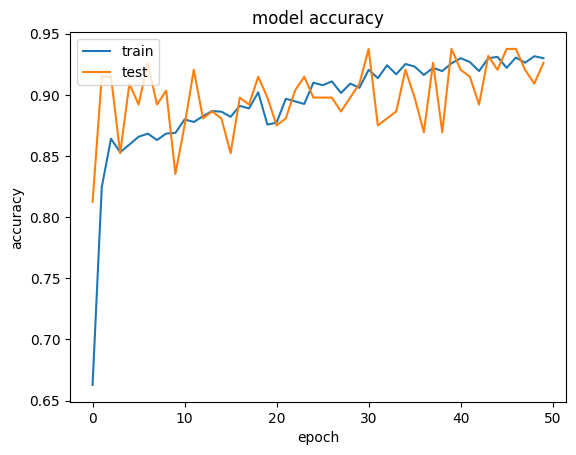

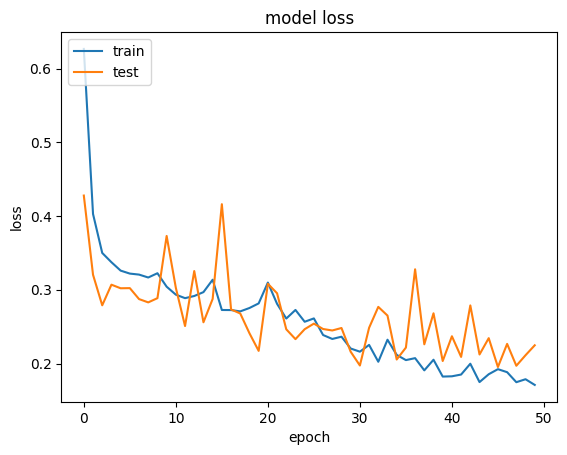

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in present in history
print(history.history.keys())
# get accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# get loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()